In [2]:
import pandas as pd
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

C:\Users\GerardSetóTarragó\AppData\Local\Temp\ipykernel_7136\2836599366.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df = original.copy()

In [4]:
df.dropna(subset=['educacion'], inplace=True)

df.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [5]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df[['tipo_contacto', 'resultado_campanas_anteriores']] = df[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [6]:
df_train = df.copy()
df_train.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
40522,40523,39,services,casado,secundaria/superiores,no,207,no,no,Sin Información,78,6-jun-2021,2,-1,0,Sin Información,no
7974,7975,54,technician,casado,secundaria/superiores,no,1865,si,no,Sin Información,125,28-may-2021,2,-1,0,Sin Información,no
22670,22671,53,entrepreneur,casado,universitarios,no,77,no,no,Sin Información,13,20-jun-2021,3,-1,0,Sin Información,no


In [7]:
df_train.loc[df_train['target'] == 'no', 'target'] = 0
df_train.loc[df_train['target'] == 'si', 'target'] = 1
df_train['target'] = df_train['target'].astype(int)

In [8]:
df_train.sample(30)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
37793,37794,59,unemployed,casado,priamaria,no,46,no,no,fijo,44,29-jul-2021,2,-1,0,Sin Información,0
35636,35637,37,blue-collar,casado,priamaria,no,1720,si,no,Sin Información,118,2-jun-2021,1,-1,0,Sin Información,0
7521,7522,49,technician,casado,universitarios,no,0,no,si,movil,67,28-jul-2021,5,252,1,sin_exito,0
16658,16659,36,management,casado,universitarios,no,1014,si,no,Sin Información,34,4-jun-2021,2,-1,0,Sin Información,0
19383,19384,44,management,soltero,universitarios,no,825,si,no,Sin Información,427,11-jun-2021,2,-1,0,Sin Información,0
40971,40972,61,housemaid,casado,universitarios,no,1389,no,no,movil,92,8-oct-2021,3,183,1,sin_exito,0
7117,7118,55,management,soltero,universitarios,no,1097,no,no,fijo,199,18-aug-2021,2,-1,0,Sin Información,0
40295,40296,33,management,casado,universitarios,no,78,si,no,movil,856,21-jul-2021,1,-1,0,Sin Información,0
35157,35158,77,retired,casado,secundaria/superiores,no,9601,no,no,fijo,515,27-mar-2021,1,-1,0,Sin Información,1
31465,31466,35,technician,soltero,secundaria/superiores,no,-54,si,no,Sin Información,70,30-may-2021,2,-1,0,Sin Información,0


In [9]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [10]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_train['educacion'] = df_train['educacion'].replace('priamaria', 'primaria')


In [11]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    22713
universitarios           13025
priamaria                 6708
Name: count, dtype: int64


In [12]:
columns_to_delete = ['fecha_contacto', 'ID']
df_train.drop(columns=columns_to_delete,inplace=True)

df_train.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
24525,80,retired,casado,primaria,no,1468,no,no,movil,256,2,181,3,exito,0
11324,56,entrepreneur,casado,secundaria/superiores,no,5838,no,no,movil,116,2,230,2,sin_exito,0
7621,42,management,divorciado,universitarios,no,742,si,no,Sin Información,58,3,-1,0,Sin Información,0


In [13]:

#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_train[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_train.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_train=pd.concat([df_train,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_train.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_train.shape)
df_train.sample(5)

(42446, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
1428,35,329,19,7,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
30101,29,-20,814,2,-1,0,1,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
41019,32,366,366,2,-1,0,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9632,59,33,138,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
29092,50,5260,51,2,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [14]:
X = df_train.drop(columns=["target"],inplace=False)
y = df_train["target"]

print("Tamaño X",X.shape)
print("Tamaño y",y.shape)

Tamaño X (42446, 37)
Tamaño y (42446,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print("Tamaño X_train",X_train.shape)
print("Tamaño y_train",y_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño y_test",y_test.shape)

Tamaño X_train (31834, 37)
Tamaño y_train (31834,)
Tamaño X_test (10612, 37)
Tamaño y_test (10612,)


In [17]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
y_pred_dicotomico = (y_pred > 0.65) *1
print(y_pred_dicotomico)


[1 0 0 ... 0 0 0]


c:\ProgramData\Anaconda3\envs\gerardseto\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
accuracy = accuracy_score(y_test, y_pred_dicotomico)
print("Precisión del modelo de Logistic Regression:", accuracy)

Precisión del modelo de Logistic Regression: 0.8921032793064455


In [19]:
# Estandarización controlada

estandarizador = StandardScaler()
estandarizador.fit(X_train)

X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [20]:
# Suponiendo que X es tu conjunto de características y y es tu variable objetivo
model_std = LogisticRegression()
model_std.fit(X_train_std, y_train)
y_pred_std = model.predict_proba(X_test_std)[:,1]
y_pred_std_dicotomico = (y_pred_dicotomico > 0.65) *1

accuracy = accuracy_score(y_test, y_pred_std_dicotomico)
print("Precisión del modelo de Logistic Regression dicotomico", accuracy)

Precisión del modelo de Logistic Regression dicotomico 0.8921032793064455


c:\ProgramData\Anaconda3\envs\gerardseto\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
# 'model' es tu modelo entrenado y 'df_train' es tu DataFrame original con las características de entrenamiento
# Selecciona todas las características (X) de tu DataFrame original 'df_train'
X_base_datos = df_train.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std=estandarizador.fit_transform(X_base_datos)


# Realiza la predicción utilizando el modelo entrenado
model_std.fit(X_base_datos_std,y)
y_pred_base_datos = model_std.predict_proba(X_base_datos_std)

# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df['target_predicho'] = y_pred_base_datos[:,1]
df['target_predicho_dic'] = df['target_predicho'] > 0.65

df.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
23057,23058,53,retired,casado,secundaria/superiores,no,1139,si,no,movil,180,18-nov-2021,1,186,6,sin_exito,no,0.105402,False
22494,22495,32,technician,soltero,secundaria/superiores,no,43,no,no,movil,159,5-aug-2021,1,-1,0,Sin Información,no,0.102430,False
1262,1263,59,management,divorciado,universitarios,no,17056,si,no,movil,470,20-nov-2021,2,-1,0,Sin Información,no,0.205721,False


Text(0, 0.5, 'Numero de datos')

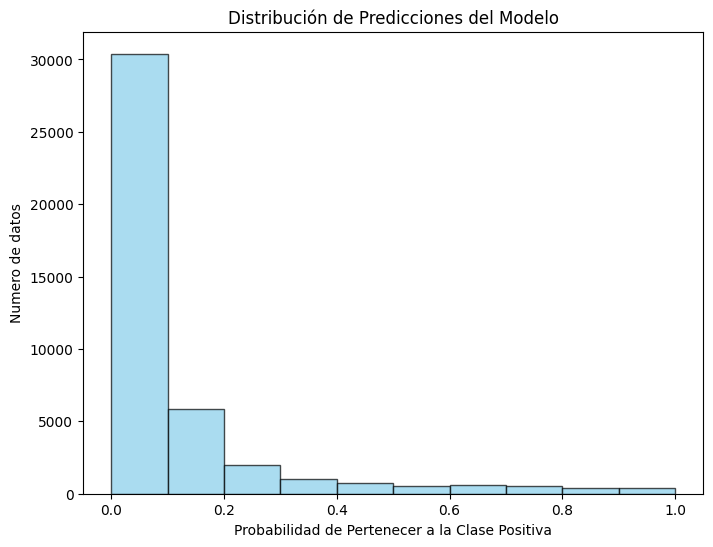

In [22]:
plt.figure(figsize=(8, 6))

# Creamos el histograma con 20 bins
plt.hist(df['target_predicho'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Añadimos etiquetas y título
plt.title('Distribución de Predicciones del Modelo')
plt.xlabel('Probabilidad de Pertenecer a la Clase Positiva')
plt.ylabel('Numero de datos')

In [23]:
df[['target','target_predicho','target_predicho_dic','ID']].sample(10)

,target,target_predicho,target_predicho_dic,ID
9076,no,0.013020,False,9077
14394,no,0.088329,False,14395
7917,no,0.031631,False,7918
5834,no,0.179108,False,5835
11834,no,0.017216,False,11835
33550,si,0.069129,False,33551
33440,no,0.165195,False,33441
13532,no,0.018384,False,13533
12840,si,0.096376,False,12841
34867,no,0.065095,False,34868


In [24]:
saldo_5000 = df[['target','target_predicho','target_predicho_dic','ID']]

In [25]:
saldo_5000 = df['saldo'] >= 5000
saldo_5000.value_counts()

saldo
False    39801
True      2645
Name: count, dtype: int64

## Curva de aprendizaje 'DATA_TRAIN'

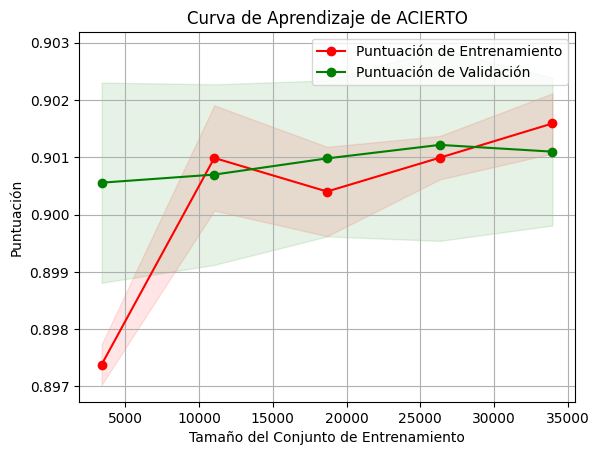

In [26]:
from sklearn.model_selection import learning_curve

# Función para plotear la curva de aprendizaje de acierto
def plot_learning_curve(estimator, X, y):
        train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5)

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title("Curva de Aprendizaje de ACIERTO")
        plt.xlabel("Tamaño del Conjunto de Entrenamiento")
        plt.ylabel("Puntuación")
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                label="Puntuación de Entrenamiento")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                label="Puntuación de Validación")

        plt.legend(loc="best")
        plt.show()

# Plotear la curva de aprendizaje
plot_learning_curve(model_std, X_base_datos_std, y)

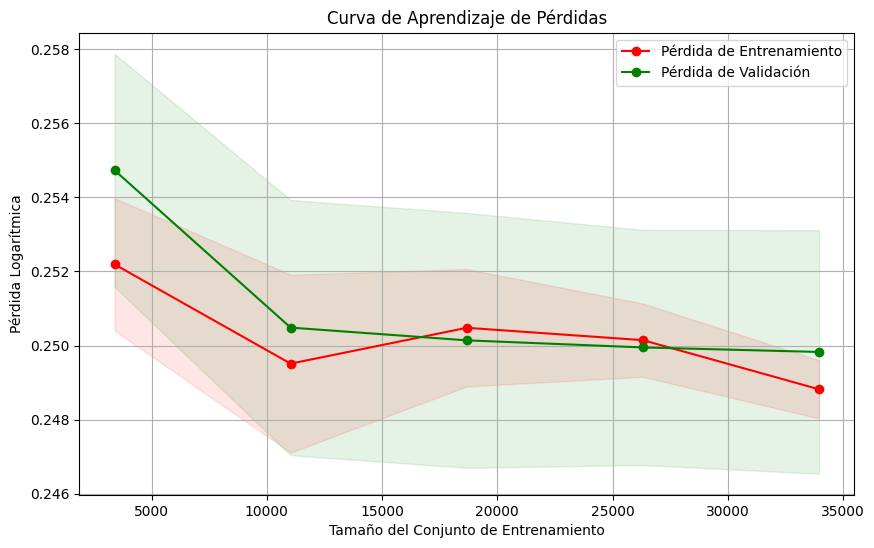

In [27]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Función para generar datos de ejemplo
def generate_data(n_samples=1000, n_features=20, n_classes=2):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, random_state=42)
    return X, y

# Función para plotear la curva de aprendizaje de pérdidas
def plot_loss_learning_curve(estimator, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_loss, test_loss = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, scoring='neg_log_loss')

    train_loss_mean = -np.mean(train_loss, axis=1)
    train_loss_std = np.std(train_loss, axis=1)
    test_loss_mean = -np.mean(test_loss, axis=1)
    test_loss_std = np.std(test_loss, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje de Pérdidas")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Pérdida Logarítmica")
    plt.grid()

    plt.fill_between(train_sizes, train_loss_mean - train_loss_std,
                    train_loss_mean + train_loss_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_loss_mean - test_loss_std,
                    test_loss_mean + test_loss_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
            label="Pérdida de Entrenamiento")
    plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
            label="Pérdida de Validación")

    plt.legend(loc="best")
    plt.show()

# Plotear la curva de aprendizaje de pérdidas
plot_loss_learning_curve(model_std, X_base_datos_std, y)


## Mean Squared Error (MSE)

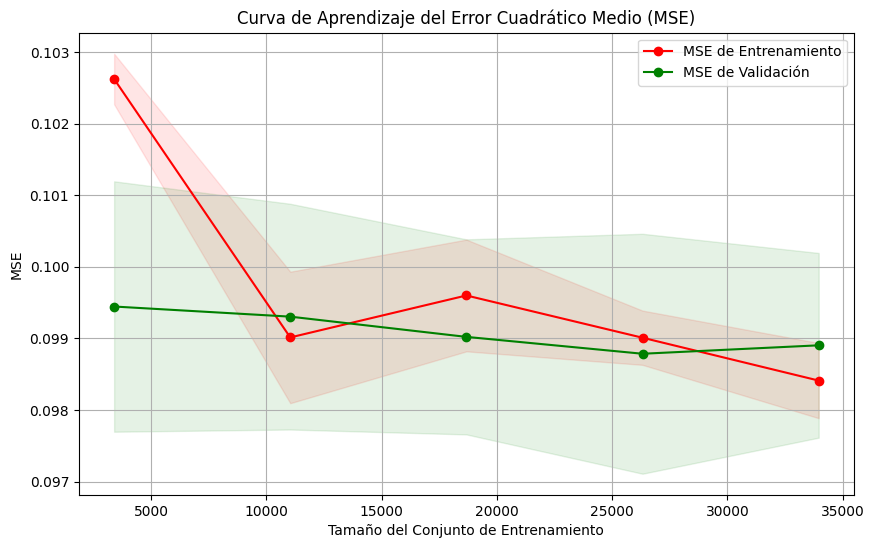

In [28]:
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error

# Función para generar datos de ejemplo
def generate_data(n_samples=1000, n_features=20, n_classes=2):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, random_state=42)
    return X, y

# Función para plotear la curva de aprendizaje del MSE
def plot_mse_learning_curve(estimator, X, y, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_mse, test_mse = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

    train_mse_mean = -np.mean(train_mse, axis=1)
    train_mse_std = np.std(train_mse, axis=1)
    test_mse_mean = -np.mean(test_mse, axis=1)
    test_mse_std = np.std(test_mse, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje del Error Cuadrático Medio (MSE)")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("MSE")
    plt.grid()

    plt.fill_between(train_sizes, train_mse_mean - train_mse_std,
                    train_mse_mean + train_mse_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mse_mean - test_mse_std,
                    test_mse_mean + test_mse_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mse_mean, 'o-', color="r",
            label="MSE de Entrenamiento")
    plt.plot(train_sizes, test_mse_mean, 'o-', color="g",
            label="MSE de Validación")

    plt.legend(loc="best")
    plt.show()

# Plotear la curva de aprendizaje del MSE
plot_mse_learning_curve(model_std, X_base_datos_std, y)

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Error cuadrático medio (MSE): 0.07761914173508089


## MODELO PREDICTIVO CON 'DATA_TEST'

In [30]:
og_test = pd.read_csv('Data_Test.csv', sep = ';')
df_test = og_test.copy()

In [31]:
df_test.dropna(subset=['educacion'], inplace=True)

df_test.isnull().sum()

ID                                  0
edad                                0
trabajo                             0
estado_civil                        0
educacion                           0
deuda                               0
saldo                               0
vivienda                            0
prestamo                            0
tipo_contacto                    1233
duracion                            0
fecha_contacto                      0
campaign                            0
tiempo_transcurrido                 0
contactos_anteriores                0
resultado_campanas_anteriores    3494
target                              0
dtype: int64

In [32]:
# Reemplaza los valores nulos en las columnas especificadas con "Sin Información"
df_test[['tipo_contacto', 'resultado_campanas_anteriores']] = df_test[['tipo_contacto', 'resultado_campanas_anteriores']].fillna("Sin Información")

df_test.isnull().sum()

ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

Buscamos modelo predictivo para nuestra columna "Target"

In [33]:
df_test_model = df_test.copy()
df_test_model.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
2354,52355,46,blue-collar,casado,secundaria/superiores,no,123,no,no,movil,381,20-aug-2021,3,-1,0,Sin Información,no
4302,54303,34,blue-collar,casado,universitarios,no,20,no,no,Sin Información,10,4-oct-2021,1,-1,0,Sin Información,no
3012,53013,36,admin.,soltero,secundaria/superiores,no,47,no,si,movil,36,9-jul-2021,6,-1,0,Sin Información,no


In [34]:
df_test_model.loc[df_test_model['target'] == 'no', 'target'] = 0
df_test_model.loc[df_test_model['target'] == 'si', 'target'] = 1
df_test_model['target'] = df_test_model['target'].astype(int)

In [35]:
df.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho,target_predicho_dic
23765,23766,42,blue-collar,casado,priamaria,no,517,si,no,movil,101,31-jul-2021,7,-1,0,Sin Información,no,0.011917,False
10724,10725,33,management,casado,secundaria/superiores,no,0,si,no,movil,407,17-nov-2021,1,-1,0,Sin Información,no,0.095031,False
13643,13644,38,services,divorciado,secundaria/superiores,no,76,si,no,movil,395,17-apr-2021,2,-1,0,Sin Información,no,0.090953,False
3821,3822,49,entrepreneur,casado,secundaria/superiores,no,1160,si,no,Sin Información,153,14-may-2021,1,-1,0,Sin Información,no,0.009924,False
29546,29547,31,technician,casado,universitarios,no,-502,si,si,Sin Información,523,26-may-2021,2,-1,0,Sin Información,no,0.035155,False


In [36]:
df_test.sample(5)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
3000,53001,57,unemployed,casado,secundaria/superiores,no,0,no,no,Sin Información,97,19-jun-2021,1,-1,0,Sin Información,no
3236,53237,28,management,soltero,universitarios,no,80,no,no,movil,676,20-oct-2021,2,146,2,sin_exito,si
3229,53230,45,blue-collar,casado,priamria,no,137,si,si,Sin Información,187,16-may-2021,19,-1,0,Sin Información,no
3081,53082,35,blue-collar,casado,priamria,no,46,no,no,movil,338,8-jul-2021,3,-1,0,Sin Información,no
2606,52607,44,technician,casado,universitarios,no,1707,no,no,movil,406,8-aug-2021,3,-1,0,Sin Información,no


In [37]:
# Reemplaza el valor erróneo en la columna 'educacion'
df_test_model['educacion'] = df_test_model['educacion'].replace('priamaria', 'primaria')

In [38]:
# Supongamos que tienes un DataFrame llamado df y quieres contar los valores en la columna 'columna_deseada'
conteo_valores = df_test['educacion'].value_counts()
print(conteo_valores)

educacion
secundaria/superiores    2271
universitarios           1318
priamria                  666
Name: count, dtype: int64


In [39]:
columns_to_delete = ['fecha_contacto', 'ID']
df_test_model.drop(columns=columns_to_delete,inplace=True)

df_test_model.sample(3)

,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
2301,54,management,divorciado,universitarios,no,26306,si,no,movil,27,1,84,3,sin_exito,0
1159,45,technician,casado,secundaria/superiores,no,2571,no,no,Sin Información,146,2,-1,0,Sin Información,0
647,30,services,casado,secundaria/superiores,no,1286,si,si,movil,544,1,-1,0,Sin Información,0


In [40]:
#Instancio el OneHot
onehot=OneHotEncoder()

# Aplico el OneHot a la columna job y guardo el resultao en a
onehot.fit(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])
a=onehot.transform(df_test_model[['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']])

# Convierto el a en data frame y lo llamo encoded_df
encoded_df = pd.DataFrame(a.toarray(), columns=onehot.get_feature_names_out(['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores']))

# Reseteo el índice de los dos data frames antes de concatenarlos
df_test_model.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# concateno los dos data frames y los guardo machacando el df
df_test_model=pd.concat([df_test_model,encoded_df],axis=1)

# Elimino la columna Job original antigua, la categórica
df_test_model.drop(columns=['trabajo','estado_civil','educacion','deuda','vivienda','prestamo','tipo_contacto','resultado_campanas_anteriores'],inplace=True)

# Muestro tamaño yu sample del data frame df transformado
print(df_test_model.shape)
df_test_model.sample(5)

(4255, 38)


,edad,saldo,duracion,campaign,tiempo_transcurrido,contactos_anteriores,target,trabajo_admin.,trabajo_blue-collar,trabajo_entrepreneur,...,vivienda_si,prestamo_no,prestamo_si,tipo_contacto_Sin Información,tipo_contacto_fijo,tipo_contacto_movil,resultado_campanas_anteriores_Sin Información,resultado_campanas_anteriores_exito,resultado_campanas_anteriores_otro,resultado_campanas_anteriores_sin_exito
4109,36,-302,36,2,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3998,47,33,298,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2125,32,0,99,13,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
510,32,-399,180,1,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2746,54,386,155,2,-1,0,0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [41]:
X_base_datos_test = df_test_model.drop('target', axis=1, inplace=False)  # Asegúrate de excluir la columna de la variable objetivo si está presente

X_base_datos_std_test=estandarizador.fit_transform(X_base_datos_test)

# Realiza la predicción utilizando el modelo previamente entrenado
y_pred_base_datos_test = model_std.predict_proba(X_base_datos_std_test)

In [42]:
y_pred_base_datos_test

array([[0.9855587 , 0.0144413 ],
       [0.56476309, 0.43523691],
       [0.9410834 , 0.0589166 ],
       ...,
       [0.93790364, 0.06209636],
       [0.86309974, 0.13690026],
       [0.98692601, 0.01307399]])

In [43]:
# Ahora 'y_pred_base_datos' contiene las predicciones para toda tu base de datos
# utilizaremos la predicion de todo el df y lo agregamos en una nueva columna para comprar valores reales a los predichos

df_test['target_predicho_test'] = y_pred_base_datos_test[:,1]
df_test['target_predicho_dic_test'] = df_test['target_predicho_test'] > 0.65

df_test.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho_test,target_predicho_dic_test
639,50640,31,management,casado,universitarios,no,2395,no,no,movil,218,27-apr-2021,1,-1,0,Sin Información,no,0.124231,False
657,50658,60,admin.,divorciado,secundaria/superiores,no,174,si,no,movil,241,15-may-2021,1,364,1,sin_exito,no,0.108078,False
1819,51820,28,services,soltero,secundaria/superiores,no,290,si,no,movil,128,18-may-2021,1,-1,0,Sin Información,no,0.041987,False


In [44]:
df_test[['target','target_predicho_test','target_predicho_dic_test','ID']].sample(10)

,target,target_predicho_test,target_predicho_dic_test,ID
989,si,0.505065,False,50990
2011,no,0.019799,False,52012
1334,si,0.209592,False,51335
98,no,0.019859,False,50099
2556,si,0.391289,False,52557
320,no,0.035558,False,50321
3779,no,0.090401,False,53780
524,no,0.169319,False,50525
1342,no,0.024943,False,51343
2248,no,0.661815,True,52249


In [45]:
df_test['target_predicho_dic_test'].value_counts()

target_predicho_dic_test
False    4101
True      154
Name: count, dtype: int64

In [46]:
saldo_5000_test = df_test[['target','target_predicho_test','target_predicho_dic_test','ID']]
saldo_5000_test = df_test[df_test['saldo'] >= 5000]

In [47]:
saldo_5000_test

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,target_predicho_test,target_predicho_dic_test
6,50007,41,admin.,casado,secundaria/superiores,no,5110,si,no,movil,231,13-apr-2021,1,-1,0,Sin Información,no,0.070027,False
20,50021,47,self-employed,divorciado,secundaria/superiores,no,8515,si,no,Sin Información,14,20-nov-2021,7,112,4,otro,no,0.008337,False
45,50046,32,admin.,soltero,secundaria/superiores,no,10218,si,no,movil,149,19-nov-2021,2,-1,0,Sin Información,no,0.068193,False
60,50061,60,retired,casado,priamria,no,71188,no,no,movil,205,6-oct-2021,1,-1,0,Sin Información,no,0.366118,False
63,50064,30,technician,soltero,universitarios,no,6619,si,no,movil,239,21-aug-2021,8,-1,0,Sin Información,no,0.048295,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,54388,38,management,casado,universitarios,no,12877,no,no,Sin Información,118,17-jun-2021,3,-1,0,Sin Información,no,0.029913,False
4393,54394,42,housemaid,casado,priamria,no,14752,no,no,Sin Información,107,19-may-2021,2,-1,0,Sin Información,no,0.016167,False
4397,54398,49,services,casado,secundaria/superiores,no,5673,no,si,movil,357,4-aug-2021,3,-1,0,Sin Información,no,0.081009,False
4400,54401,33,blue-collar,soltero,secundaria/superiores,no,5137,si,no,movil,123,6-may-2021,1,-1,0,Sin Información,no,0.042741,False
